In [1]:
# Building the CNN to classify whether a image is of Dog or Cat

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# Initialising the CNN
classifier = Sequential()

In [3]:
## CNN Model Steps

# Step-1. Convolution
# Step-2. Max Pooling
# Step-3. Flattening
# Step-4. Full Connection

In [4]:
# Step 1 - Convolution - It is done to extract features by applying Filters.
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# '32' represents that we are using 32 Feature Map which is of size (3 * 3).
# input_shape = (64, 64, 3) represents that we are using the Input Image of size (64, 64) pixels and 3 shows that we are 
# using the Coloured Image as Data.
# Activation function represents that we are using the 'relu' Activation Function.

In [5]:
# Step 2 - Pooling  - It is done to reduce the number of nuerons in the Flattening Step.
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# pool_size = (2, 2) represents that we are using the (2, 2) matrix to pool the Data.

In [6]:
# Adding a Second Convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# We do not need to specify the input_shape in the second Convolution Layer. 

In [7]:
# Step 3 - Flattening  - It is done to convert the Pooled Feature Map (2-D) into 1-D Input Array
classifier.add(Flatten())

In [8]:
# Step 4 - Full connection - It is building the simple ANN with the 1-D Feature Input (Get from Step-3).

# Adding a Hidden Layer in the CNN.
classifier.add(Dense(units = 128, activation = 'relu'))

# Adding a Output Layer in the CNN.
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# units = 128 is the number of Nuerons in the Hidden Layer.
# units = 1 is the number of Nuerons in the Output Layer.

In [9]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# optimizer = 'adam' for Stochastic Gradient Descent.
# loss = 'binary_crossentropy' for binary classification that is Dog and Cat.
# metrics = ['accuracy'] for getting the Accuracy metric.

In [10]:
# Data Augementation - Data Augementation is used to generate more images with a single image by applying the Transformation 
# like Rotation, Shearing, Flipping, Zooming etc. 
# It is done using the ImageGenerator Library of keras.  

In [11]:
# Apply the ImageGenerator on the Image
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# (rescale = 1./255) is to transform every pixel value from range [0,255] to [0,1].
# (shear_range = 0.2) is the transformation which changes the shape of Image. The sliding of layers of Image occur 
# by 0.2 factor.
# (zoom_range = 0.2) is the transformation which change the size of image by 0.2 factor.
# (horizontal_flip = True) is the flipping of Image in the horizontal direction. 

In [12]:
train_datagen

In [13]:
# Getting the Data image from the directory.
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 color_mode = 'rgb'
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            color_mode = 'rgb'
                                            class_mode = 'binary')

# 'dataset/training_set' is the Directory path of the training data or test_data.
# target_size = (64, 64) is the size of image we want to take as we take in the Convolution step.
# batch_size = 32 means we have considered the batch size of 32 images at a time.
# class_mode = 'binary' is that we are classifying into 2 categories that is Cat and Dog.
# color_mode = 'rgb' that is for coloured images and for greyscale it is 'greyscale'.

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
# Getting the Training_Set
training_set

In [15]:
# Getting the Test_Set
test_set

In [16]:
# Fitting the CNN to the images
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 2000)

# (training_set) is the set of train Data on which we are training our model.
# (steps_per_epoch = 8000) is the number of images processed in 1 epoch.
# (epochs = 15) is the Number of epochs to be performed.
# (validation_data = test_set) is the set of test Data on which we are testing our Model.
# (validation_steps = 2000) is the number of images in the test_set.

Epoch 1/5
8000/8000 [==============================] - 3654s 457ms/step - loss: 0.3564 - accuracy: 0.8339 - val_loss: 1.0290 - val_accuracy: 0.7955
Epoch 2/5
8000/8000 [==============================] - 1640s 205ms/step - loss: 0.1111 - accuracy: 0.9572 - val_loss: 0.4714 - val_accuracy: 0.7959
Epoch 3/5
8000/8000 [==============================] - 1421s 178ms/step - loss: 0.0528 - accuracy: 0.9810 - val_loss: 0.6591 - val_accuracy: 0.7987
Epoch 4/5
8000/8000 [==============================] - 3816s 477ms/step - loss: 0.0373 - accuracy: 0.9870 - val_loss: 0.9124 - val_accuracy: 0.7993
Epoch 5/5
8000/8000 [==============================] - 4666s 583ms/step - loss: 0.0310 - accuracy: 0.9896 - val_loss: 1.5500 - val_accuracy: 0.7940


In [17]:
# loss - 0.0310 - accuracy: 0.9896 - val_loss: 1.5500 - val_accuracy: 0.7940

# Accuracy on the Training Set is 98.96
# Accuracy on the Testing Set is 79.40

In [18]:
# Save Model on the Disk

# serialize model to JSON
classifier_json = classifier.to_json()
with open('classifier.json', 'w') as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
classifier.save_weights("classifier.h5")
print("Saved model to disk")

Saved model to disk


In [16]:
# Retrieving the Saved Model
from keras.models import model_from_json

# load json and create model
json_file = open('classifier.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
classifier = model_from_json(loaded_model_json)
# load weights into new model
classifier.load_weights("classifier.h5")
print("Loaded model from disk")

Loaded model from disk


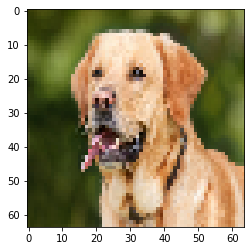

In [18]:
# Making a new Single prediction
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

test_image = image.load_img('dataset/single_prediction/Image1.jpg', target_size = (64, 64))

plt.show(plt.imshow(test_image))

# load_img(path) is used to load a image on that particular path

In [19]:
test_image = image.img_to_array(test_image)    # This is a Numpy array with shape (64, 64, 3).

print(test_image.shape, "----------->", test_image)

(64, 64, 3) -----------> [[[ 54.  58.   7.]
  [ 58.  63.   9.]
  [ 64.  67.  10.]
  ...
  [136. 144.  71.]
  [140. 150.  77.]
  [139. 149.  78.]]

 [[ 48.  54.   6.]
  [ 51.  58.   7.]
  [ 58.  63.   9.]
  ...
  [129. 137.  64.]
  [139. 149.  78.]
  [141. 151.  80.]]

 [[ 48.  56.   7.]
  [ 48.  56.   7.]
  [ 54.  61.  10.]
  ...
  [123. 130.  63.]
  [136. 145.  80.]
  [140. 149.  82.]]

 ...

 [[ 46.  55.  12.]
  [ 42.  50.   9.]
  [ 38.  49.   9.]
  ...
  [239. 205. 170.]
  [235. 209. 186.]
  [229. 202. 173.]]

 [[ 50.  57.  15.]
  [ 42.  50.   9.]
  [ 44.  52.  11.]
  ...
  [234. 200. 162.]
  [236. 206. 178.]
  [234. 203. 174.]]

 [[ 53.  59.  13.]
  [ 43.  51.  10.]
  [ 49.  56.  12.]
  ...
  [231. 195. 159.]
  [235. 213. 190.]
  [233. 206. 179.]]]


In [20]:
test_image = test_image.reshape((1, ) + test_image.shape)   # This is a numpy array with shape (1, 64, 64, 3)
#              OR
# test_image = np.expand_dims(test_image, axis = 0)

print(test_image.shape, '-------', test_image)

(1, 64, 64, 3) ------- [[[[ 54.  58.   7.]
   [ 58.  63.   9.]
   [ 64.  67.  10.]
   ...
   [136. 144.  71.]
   [140. 150.  77.]
   [139. 149.  78.]]

  [[ 48.  54.   6.]
   [ 51.  58.   7.]
   [ 58.  63.   9.]
   ...
   [129. 137.  64.]
   [139. 149.  78.]
   [141. 151.  80.]]

  [[ 48.  56.   7.]
   [ 48.  56.   7.]
   [ 54.  61.  10.]
   ...
   [123. 130.  63.]
   [136. 145.  80.]
   [140. 149.  82.]]

  ...

  [[ 46.  55.  12.]
   [ 42.  50.   9.]
   [ 38.  49.   9.]
   ...
   [239. 205. 170.]
   [235. 209. 186.]
   [229. 202. 173.]]

  [[ 50.  57.  15.]
   [ 42.  50.   9.]
   [ 44.  52.  11.]
   ...
   [234. 200. 162.]
   [236. 206. 178.]
   [234. 203. 174.]]

  [[ 53.  59.  13.]
   [ 43.  51.  10.]
   [ 49.  56.  12.]
   ...
   [231. 195. 159.]
   [235. 213. 190.]
   [233. 206. 179.]]]]


In [21]:
result = classifier.predict(test_image)
print("Label: ", training_set.class_indices)    # It is used to check Dog & Cat is label with 0 or 1.
if result[0][0] == 1:
    prediction = 'DOG'
else:
    prediction = 'CAT'
    
print("It is: ", prediction)

Label:  {'cats': 0, 'dogs': 1}
It is:  DOG


In [4]:
# Making a new prediction
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

org_image = image.load_img('dataset/single_prediction/Image1.jpg', target_size = (64, 64))
# print(org_image.shape)

test_image = image.img_to_array(org_image)
print(test_image.shape)
test_image = test_image.reshape((1, ) + test_image.shape)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'DOG'
else:
    prediction = 'CAT'
    
plt.title("It is a {}".format(prediction))
plt.show(plt.imshow(org_image))

(64, 64, 3)


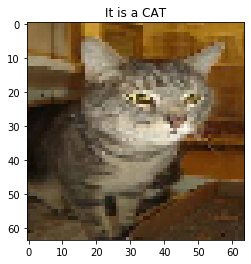

In [23]:
org_image = image.load_img('dataset/single_prediction/Image2.jpg', target_size = (64, 64))

test_image = image.img_to_array(org_image)
test_image = test_image.reshape((1, ) + test_image.shape)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'DOG'
else:
    prediction = 'CAT'
    
plt.title("It is a {}".format(prediction))
plt.show(plt.imshow(org_image))

In [17]:
print(type(test_set))

<class 'keras.preprocessing.image.DirectoryIterator'>


In [ ]:
# import numpy as np
# test_set = np.asarray(test_set)
# print(test_set.shape)